In [1]:
import pandas as pd
df = pd.read_csv(filepath_or_buffer='/kaggle/input/company-reviews-and-ratings-from-ambitionbox/AmbitionBox_dataset.csv', 
                index_col=['Index'], skipinitialspace=True, )
# we have a lot of damaged rows; let's drop them
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2714 entries, 0 to 9984
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company name      2714 non-null   object 
 1   Rating            2714 non-null   float64
 2   Company type      2714 non-null   object 
 3   Sector            2714 non-null   object 
 4   Old               2714 non-null   object 
 5   Company location  2714 non-null   object 
 6   Employees         2714 non-null   object 
 7   Reviews           2714 non-null   object 
dtypes: float64(1), object(7)
memory usage: 190.8+ KB


In [2]:
# we have a lot of trailing spaces we need to remove
for column in [item for item in df.columns.tolist() if item != 'Rating']:
    df[column] = df[column].str.strip()

<Axes: ylabel='Frequency'>

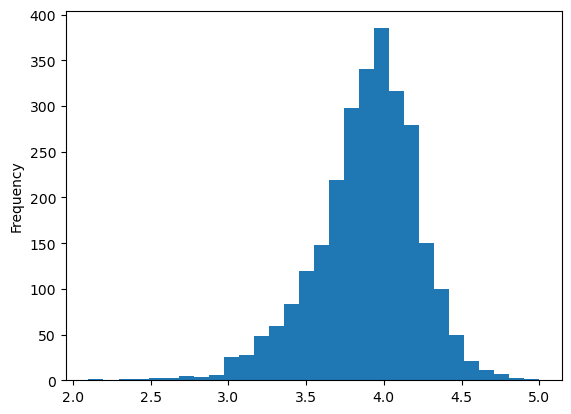

In [3]:
df['Rating'].plot.hist(bins=30)

In [4]:
df['Age (years)'] = df['Old'].apply(func=lambda x: int(x.split()[0]))
df.head()

,Company name,Rating,Company type,Sector,Old,Company location,Employees,Reviews,Age (years)
Index,,,,,,,,,
0,TCS,3.8,Public,IT Services & Consulting,55 years old,Mumbai +280 more,1 Lakh+ Employees,62.2k Reviews,55
1,Accenture,4.1,Public,IT Services & Consulting,34 years old,Dublin +141 more,1 Lakh+ Employees,39.7k Reviews,34
2,Cognizant,3.9,Forbes Global 2000,IT Services & Consulting,29 years old,Teaneck. New Jersey. +111 more,1 Lakh+ Employees,36.2k Reviews,29
3,Wipro,3.8,Public,IT Services & Consulting,78 years old,Bangalore/Bengaluru +243 more,1 Lakh+ Employees,29.8k Reviews,78
4,ICICI Bank,4.0,Public,Banking,29 years old,Mumbai +1183 more,1 Lakh+ Employees,29.4k Reviews,29


<Axes: ylabel='Frequency'>

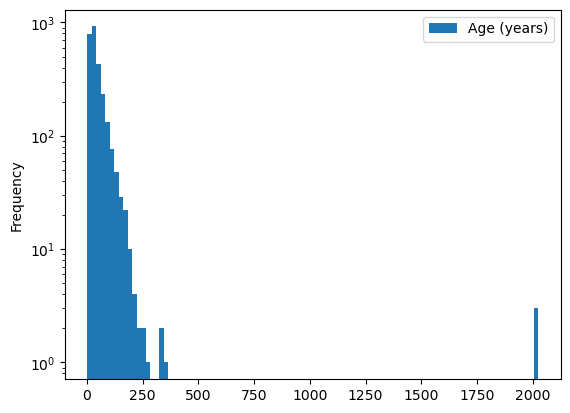

In [5]:
df['Age (years)'].plot.hist(bins=100, legend=True, log=True)

In [6]:
df['Age (years)'].nlargest(n=10)

Index
1231    2023
6072    2023
6097    2023
575      358
354      333
990      327
4619     279
3708     258
4769     248
2145     235
Name: Age (years), dtype: int64

<Axes: >

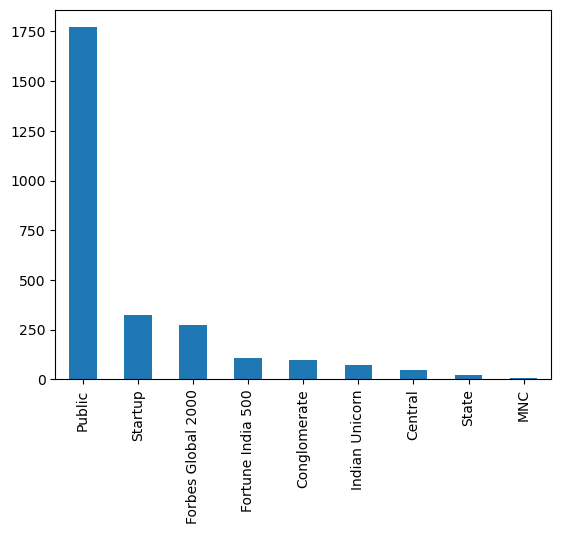

In [7]:
df['Company type'].value_counts().plot(kind='bar')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[None]

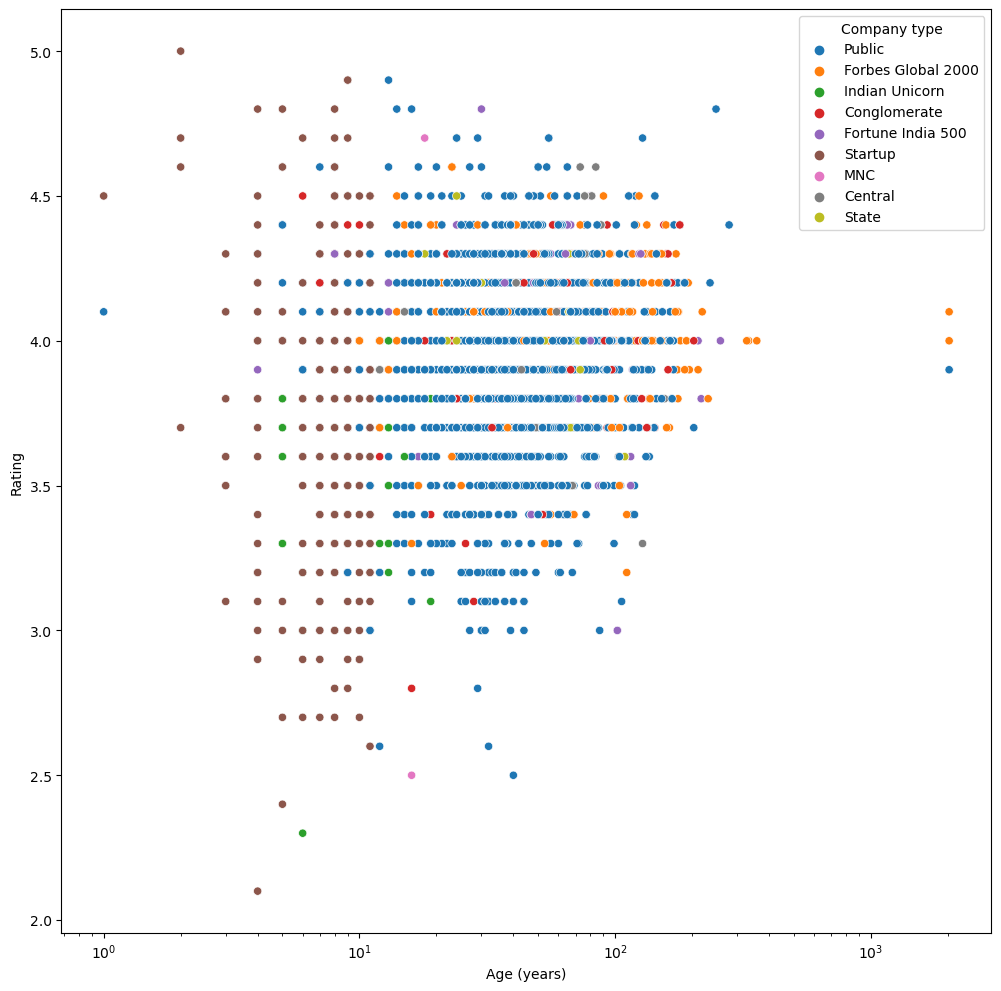

In [8]:
from matplotlib.pyplot import subplots
from seaborn import scatterplot
_, ax = subplots(figsize=(12, 12))
scatterplot(ax=ax, data=df, x='Age (years)', y='Rating', hue='Company type').set(xscale='log')

Startups/unicorns tend to be younger and 500/2000 companies tend to be older; neither age nor company type seems to be predictive of rating.

<Axes: ylabel='Frequency'>

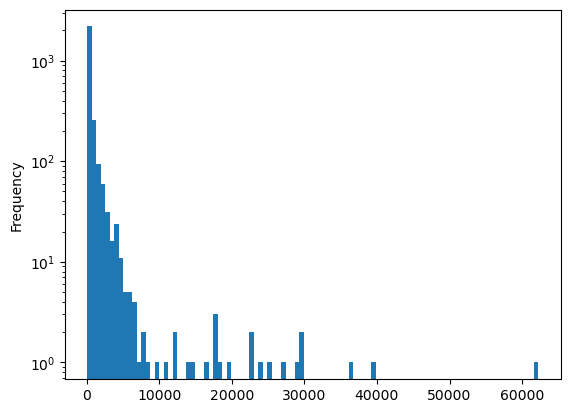

In [9]:
def to_numeric(arg):
    arg = arg.replace(' Reviews', '')
    if 'k' in arg:
        return 1000 * float(arg.replace('k', ''))
    return float(arg)
    
df['review_count'] = df['Reviews'].apply(to_numeric)
df['review_count'].plot.hist(bins=100, log=True)

[None]

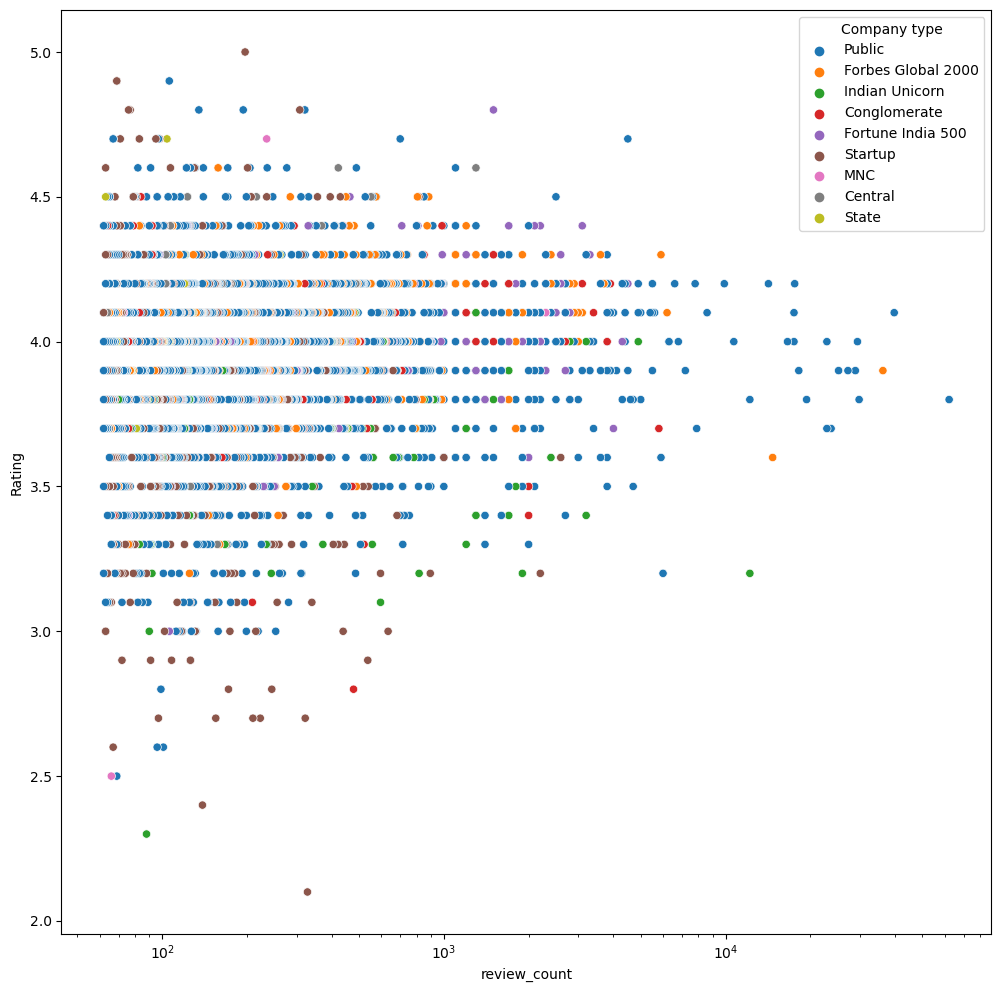

In [10]:
_, ax = subplots(figsize=(12, 12))
scatterplot(ax=ax, data=df, x='review_count', y='Rating', hue='Company type').set(xscale='log')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


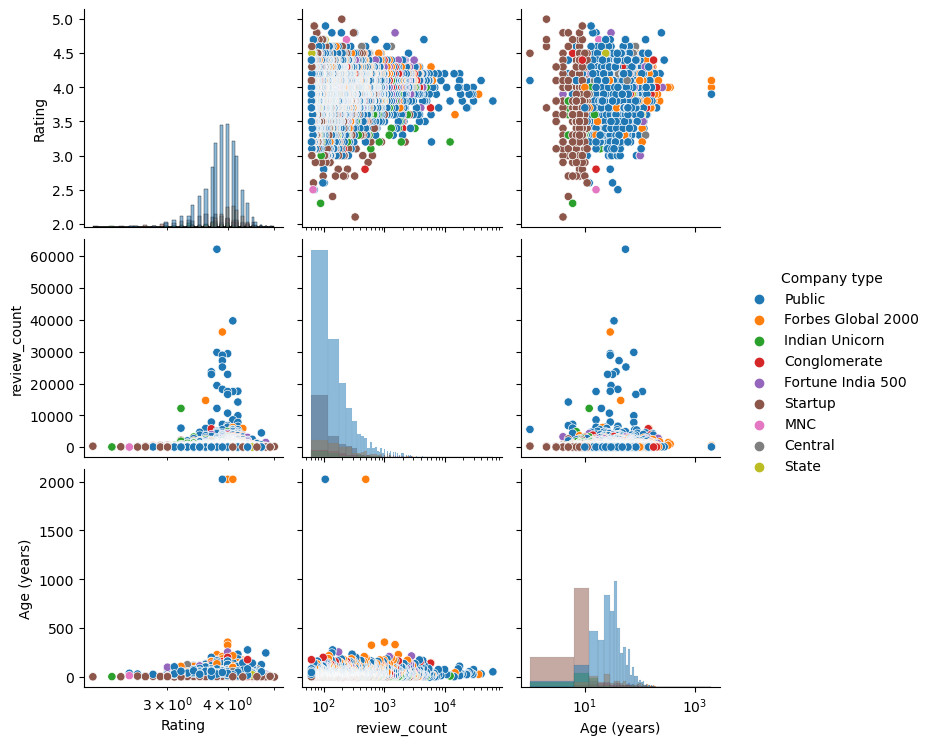

In [11]:
from seaborn import pairplot
pairplot(data=df[['Rating', 'review_count', 'Age (years)', 'Company type']], hue='Company type', diag_kind='hist').set(xscale='log')

Honestly it looks like Rating as a function of Age is the most promising graph, and we've already seen that.